# Importing Libraries and Defining Functions

In [443]:
import pandas as pd
import pyreadstat
import re
def load_file(file_path):
    """
    Loads a .sav (SPSS) or .csv file into a Pandas DataFrame.

    Parameters:
    file_path (str): The path to the file.

    Returns:
    tuple:
        - df (pd.DataFrame): The loaded dataset.
        - meta (pyreadstat.metadata_container or None): Metadata if loading a .sav file, otherwise None.

    Raises:
    FileNotFoundError: If the specified file is not found.
    Exception: If an error occurs while reading the file.
    """
    # Check if file exists
    if not os.path.exists(file_path):
        print(f"Error: File not found -> {file_path}")
        return None, None

    file_extension = os.path.splitext(file_path)[-1].lower()  # Get file extension

    try:
        if file_extension == ".sav":
            df, meta = pyreadstat.read_sav(file_path)  # Read SPSS file
            print(f"Successfully loaded SPSS file: {file_path}")
            return df, meta
        elif file_extension == ".csv":
            df = pd.read_csv(file_path)  # Read CSV file
            print(f"Successfully loaded CSV file: {file_path}")
            return df, None  # No metadata for CSV
        else:
            print(f"Error: Unsupported file format -> {file_extension}")
            return None, None
    except Exception as e:
        print(f"Error loading file: {e}")
        return None, None
        

def find_columns(df, pattern):
    return [col for col in df.columns if re.search(pattern, col, re.IGNORECASE)]
    
def filter_desired_columns(data, *columns):
    selected_columns = []

    for col in columns:
        if isinstance(col, list):  # If col is a list, add all items to selected_columns
            selected_columns.extend(col)
        else:  # If col is a single column name, add it directly
            selected_columns.append(col)
    
    try:
        return data[selected_columns]  # Filter DataFrame with selected columns
    except KeyError as e:
        print(f"Error: Some columns not found in DataFrame - {e}")
        return None 
    
def map_numerical_data_to_labels(data,column_name="x" ,new_name="y",mapping={}):
    data[new_name]=data[column_name].map(mapping)
    data.drop(column_name, axis=1, inplace=True)
    return data

def age(data):
    a=data[data[age_column]==1]
    return a

def males(data):
    b=data[data[gender_column]==1]
    return b# Or any other number that the data might represent as male

def females(data):
    b=data[data[gender_column]==2]
    return b
    
def sport(data):
    b=data[data[sport_column]==1]
    return b

def weighted_sports_count(data, weight_column="z"):
    c=(data.filter(like='Age').T*data[weight_column]).sum(axis=1)
    return c.sum()

import os

def convert_to_desired_format(data, desired_fileformat='csv', desired_file_name=None):
     # Default file name if none is provided
    if desired_file_name is None:
        desired_file_name = f"output.{desired_fileformat}"
    
    # Convert and save in the required format
    if desired_fileformat.lower() == 'csv':
        data.to_csv(desired_file_name, index=False)
    elif desired_fileformat.lower() == 'json':
        data.to_json(desired_file_name, orient="records", indent=4)
    elif desired_fileformat.lower() in ['xls', 'xlsx', 'excel']:
        data.to_excel(desired_file_name, index=False, engine="openpyxl")
    else:
        raise ValueError("Unsupported file format. Choose from: 'csv', 'json', 'excel'.")

    print(f"Data saved as {desired_file_name}")
                                                                                    

# Function 1: load_file()

In [10]:
'''
1. You will have to initialize a variable file_path and give the path of the file in it. Wherever the file is saved, just copy that path and
save it in double or single inverted commas.
'''
file_path="ALS_Young_2017-18.sav"


Successfully loaded: ALS_Young_2017-18.sav


In [ ]:
#If the file is sav file use this code
df_1, meta = load_file(file_path)

In [ ]:
#If the file is a csv file use this code
df_1 = load_file(file_path)

# Function 2: find_columns()

In [12]:
'''
Regular expression has been used to find relevant variables defined by the user.
Following are some of the patterns that are generally used for definition:
'''
gender_pattern=r"gend"      # For identifying gender related variables
sport_pattern = r"rugby"    # For identifying variables which belong to a particular sport
age_pattern = r"age"        # For identifying age related variables
location_pattern = r"county|region|state|district|area|location|csp|la_"  # For region/county related variables.
                                                                          #In ALS Adults data "csp" and "la" denote the region.
'''
The next step is calling the function. Here are the steps to effectively call a function:
1. When we call a function, we use paranthesis (open and close round bracket) after the name of the function (For eg: Function_name_1()).
2. In the paranthesis, we will pass an argument, i.e., we will give an input that the function wants.
   This input can be a dataset, an already saved variable/term. 
3. To check the inputs, place the cursor between the paranthesis and press 'Shift+Tab'.
4. Now finally to see the results, store the function with the inputs as a new variable/term. For eg. Var_1=Function_name_1(input_1= , input_2=)
P.S. The new variable term can be anything and it depends on what operation has been done inside the function.
In our usecase, the stored variable will be a dataset in form a DataFrame (Python's way of storing a dataset using Pandas library).
'''
relevant_sport_columns = find_columns(df_1, sport_pattern)
relevant_age_columns = find_columns(df_1, age_pattern)
relevant_location_columns = find_columns(df_1, location_pattern)
relevant_gender_columns = find_columns(df_1, gender_pattern)

# View the results by replacing it the following columns by the stored varible name for the function used.
print(relevant_sport_columns)
print("\n",relevant_gender_columns)
print("\n",relevant_age_columns)
print("\n",relevant_location_columns)

['mins_modplus_everywhere_week_RUGBY_CC018', 'mins_modplus_everywhere_outdoors_week_RUGBY_CC018', 'mins_modplus_everywhere_indoors_week_RUGBY_CC018', 'mins_modplus_inschool_week_RUGBY_CC018', 'mins_modplus_outschool_week_RUGBY_CC018', 'mins_modplus_inschool_indoors_week_RUGBY_CC018', 'mins_modplus_inschool_outdoors_week_RUGBY_CC018', 'mins_modplus_outschool_indoors_week_RUGBY_CC018', 'mins_modplus_outschool_outdoors_week_RUGBY_CC018', 'Done60_modplus_everywhere_mon_RUGBY_CC018', 'Done60_modplus_everywhere_tue_RUGBY_CC018', 'Done60_modplus_everywhere_wed_RUGBY_CC018', 'Done60_modplus_everywhere_thu_RUGBY_CC018', 'Done60_modplus_everywhere_fri_RUGBY_CC018', 'Done60_modplus_everywhere_sat_RUGBY_CC018', 'Done60_modplus_everywhere_sun_RUGBY_CC018', 'mins_modplus_outschool_mon_RUGBY_CC018', 'mins_modplus_outschool_tue_RUGBY_CC018', 'mins_modplus_outschool_wed_RUGBY_CC018', 'mins_modplus_outschool_thu_RUGBY_CC018', 'mins_modplus_outschool_fri_RUGBY_CC018', 'mins_modplus_outschool_sat_RUGBY_CC

## User Input

In [ ]:
'''
Function 2 produces an output and this is where the user needs to select the relevant variables for them
'''
gender_column='gend3'
sport_column = "onceawk_modplus_everywhere_GR_RUGBY_CC018"
age_column = "age_11"
location_columns = ["Region_name","CSP_name"]

'''
There will be some generic variables that are present in the dataset and mostly they are in the beginning columns itself.
Add any column that you as a researcher deem fit.
Select the one you find the best and replace that variable name in the quotes below and name it accordingly
'''

generic_columns=["Respondent_Serial","wt_gross"]

# Function 3: filter_desired_column()

In [16]:
'''
All the previously defined columns will get fitered using this function
'''
filtered_df=filter_desired_columns(df_1, generic_columns, sport_column, age_column, gender_column, location_columns)

# Function 4: map_numerical_data_to_labels() 

In [ ]:
'''
 Function 3: Map numerical labels to actual names.
Usually in datasets, some categorical variables will be represented using numbers. We need to convert it to category using
mapping function of Python.
Step 1: Annotate the numerical value (which is there in the dataset) as key and,
the actual name (which you can find in data dictionaries) as a value in dictionary format (key:value).
Step 2: Replace the names of variables in the below function.
'''

In [20]:
csp_mapping = {
    1.0: "Bedfordshire & Luton",
    2.0: "Berkshire",
    3.0: "Birmingham",
    4.0: "Black Country",
    5.0: "Buckinghamshire and Milton Keynes",
    6.0: "Peterborough & Cambridgeshire",
    7.0: "Cheshire",
    8.0: "Cornwall and Isles of Scilly",
    9.0: "Cumbria",
    10.0: "Derbyshire",
    11.0: "Devon",
    12.0: "Dorset",
    13.0: "Durham",
    14.0: "Greater Essex",
    15.0: "Gloucestershire",
    16.0: "Greater Manchester",
    17.0: "Hampshire and Isle of Wight",
    18.0: "Herefordshire and Worcestershire",
    19.0: "Hertfordshire",
    20.0: "Humber",
    21.0: "Kent",
    22.0: "Lancashire",
    23.0: "Leicester, Leicestershire and Rutland",
    24.0: "Lincolnshire",
    25.0: "London",
    26.0: "Merseyside",
    27.0: "Norfolk",
    28.0: "North Yorkshire",
    29.0: "Northamptonshire",
    30.0: "Northumberland",
    31.0: "Nottinghamshire",
    32.0: "Oxfordshire",
    33.0: "Shropshire and Telford and the Wrekin",
    34.0: "Somerset",
    35.0: "South Yorkshire",
    36.0: "Staffordshire and Stoke-on-Trent",
    37.0: "Suffolk",
    38.0: "Surrey",
    39.0: "Sussex",
    40.0: "Tees Valley",
    41.0: "Tyne and Wear",
    42.0: "Coventry, Solihull & Warwickshire",
    43.0: "Bristol and West of England",
    44.0: "West Yorkshire",
    45.0: "Wiltshire & Swindon"
}


In [22]:
region_mapping = {
    1.0: "East",
    2.0: "East Midlands",
    3.0: "London",
    4.0: "North East",
    5.0: "North West",
    6.0: "South East",
    7.0: "South West",
    8.0: "West Midlands",
    9.0: "Yorkshire and the Humber"
}

In [ ]:
map_numerical_data_to_labels(filtered_df,column_name="CSP_name",new_name="CSP", mapping=csp_mapping)   
map_numerical_data_to_labels(filtered_df,column_name="Region_name",new_name="Region", mapping=region_mapping)

# Optional Step (Can Skip)

In [26]:
# Optional Step: Was required for this study, can skip it
filtered_df = filtered_df.rename(columns={"age_11": "Age"})
filtered_df["Age"] = filtered_df["Age"].astype(str)
filtered_df = filtered_df.join(
    filtered_df["Age"].str.get_dummies(sep=",").add_prefix("Age_")
)

# Function 5: Common Functions for preprocessing

In [89]:
'''
Common functions for filtering values in a column. You can ignore if it doesn't apply to you or your dataset.
'''
def age(data):
    a=data[data[age_column]==1]  # Or any other number that the data might represent the age category.
    return a                     # In our case, "1" means age category 16-19.

def males(data):
    b=data[data[gender_column]==1] # Or any other number that the data might represent as male

def females(data):
    b=data[data[gender_column]==2] 
    
def sport(data):
    b=data[data[sport_column]==1] # We have already filtered the rugby column which has values, "0" meaning No, "1" meaning yes to playing rugby or not.
    return b

Age_range=age(filtered_df)
Sport=sport(Age_range)

# Function 6: convert_to_desired_format()

In [150]:
'''
If you have many datasets for different years you wil need to save your filtered datasets properly. We will use
the first function again to exyract the desired files for further analysis and preprocessing. If it doesn't apply to you, you
can skip to the next step.
'''
convert_to_desired_format(Sport, desired_fileformat='csv', desired_file_name="Sport_17_18_young_adults_new.csv")

Data saved as Sport_17_18_young_adults_new.csv


# Extract Saved files using function 1

In [33]:
df_2017_18, _ = load_file("Sport_17_18_young_adults_new.csv")
df_2018_19, _ = load_file("Sport_18_19_young_adults_new.csv")
df_2019_20, _ = load_file("Sport_19_20_young_adults_new.csv")
df_2020_21, _ = load_file("Sport_20_21_young_adults_new.csv")
df_2021_22, _ = load_file("Sport_21_22_young_adults_new.csv")
df_2022_23, _ = load_file("Sport_22_23_young_adults_new.csv")


Successfully loaded CSV file: Sport_17_18_young_adults_new.csv
Successfully loaded CSV file: Sport_18_19_young_adults_new.csv
Successfully loaded CSV file: Sport_19_20_young_adults_new.csv
Successfully loaded CSV file: Sport_20_21_young_adults_new.csv
Successfully loaded CSV file: Sport_21_22_young_adults_new.csv
Successfully loaded CSV file: Sport_22_23_young_adults_new.csv


# Function 7: weight_calc()

In [333]:
'''
Function to calculate weighted column, to estimate the population from sample
'''
def weight_calc(df, col_1, col_2="wt_gross"):
    df["weighted_total"] = df[col_1] * df[col_2]
    return df
'''
Sport column variable (replace with actual column name)
sport_column = "Sport_Column_Name"
'''

# Apply weight_calc to all datasets
df_2017_18 = weight_calc(df_2017_18, col_1=sport_column)
df_2018_19 = weight_calc(df_2018_19, col_1=sport_column)
df_2019_20 = weight_calc(df_2019_20, col_1=sport_column)
df_2020_21 = weight_calc(df_2020_21, col_1=sport_column)
df_2021_22 = weight_calc(df_2021_22, col_1=sport_column)
df_2022_23 = weight_calc(df_2022_23, col_1=sport_column)




# Function 8: split_by_gender()

In [410]:
'''
Function to create male & female subsets. Just know you have to give the male code, female code according to your dataset
'''
def split_by_gender(df,gender_column='gend3', male_code=1, female_code=2):
    df_male = df[df[gender_column] == male_code]
    df_female = df[df[gender_column] == female_code]
    return df_male, df_female

# Splitting each dataset into male & female
df_2017_18_male, df_2017_18_female = split_by_gender(df_2017_18)
df_2018_19_male, df_2018_19_female = split_by_gender(df_2018_19)
df_2019_20_male, df_2019_20_female = split_by_gender(df_2019_20)
df_2020_21_male, df_2020_21_female = split_by_gender(df_2020_21)
df_2021_22_male, df_2021_22_female = split_by_gender(df_2021_22)
df_2022_23_male, df_2022_23_female = split_by_gender(df_2022_23)



# Function 9: plot_weighted_gender_trend()

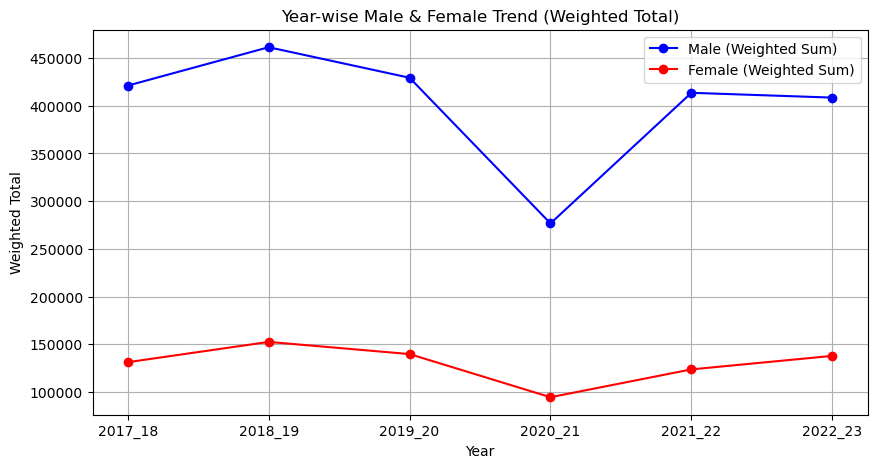

In [353]:
import matplotlib.pyplot as plt

# Function to create year-wise line plot for Male & Female trends
def plot_weighted_gender_trend():
    years = ["2017_18", "2018_19", "2019_20", "2020_21", "2021_22","2022_23"]

    male_sums = [
        df_2017_18_male["weighted_total"].sum(),
        df_2018_19_male["weighted_total"].sum(),
        df_2019_20_male["weighted_total"].sum(),
        df_2020_21_male["weighted_total"].sum(),
        df_2021_22_male["weighted_total"].sum(),
        df_2022_23_male["weighted_total"].sum()
    ]

    female_sums = [
        df_2017_18_female["weighted_total"].sum(),
        df_2018_19_female["weighted_total"].sum(),
        df_2019_20_female["weighted_total"].sum(),
        df_2020_21_female["weighted_total"].sum(),
        df_2021_22_female["weighted_total"].sum(),
        df_2022_23_female["weighted_total"].sum()

    ]

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(years, male_sums, marker='o', linestyle='-', label="Male (Weighted Sum)", color='blue')
    plt.plot(years, female_sums, marker='o', linestyle='-', label="Female (Weighted Sum)", color='red')

    plt.xlabel("Year")
    plt.ylabel("Weighted Total")
    plt.title("Year-wise Male & Female Trend (Weighted Total)")
    plt.legend()
    plt.grid(True)

    plt.show()

# Call the function to generate the plot
plot_weighted_gender_trend()


# Function 10: group_by_columns()

In [ ]:
import pandas as pd

def group_by_columns(datasets, years, groupby_cols, count_col):

    grouped_data = {}

    for df, year in zip(datasets, years):
        grouped_df = df.groupby(groupby_cols)[count_col].sum()
        grouped_data[year] = grouped_df.copy()  # Ensure a copy is stored
    df1=pd.DataFrame(grouped_data)
    return df1


# Function 11: plot_category_trends()

In [222]:
import matplotlib.pyplot as plt
# ✅ Function to Plot Trends Based on Different Modes
def plot_category_trends(df, top_n=5, mode="largest", xlabel="Year", ylabel="Participation Count", title="Participation Trends"):

    if mode == "largest":                      # "largest" → Finds top N categories with the highest total participation over all years.
        selected_categories = df.sum(axis=1).nlargest(top_n).index
        title = f"Top {top_n} {title}"

    elif mode == "smallest":                  # "smallest" → Finds bottom N categories with the lowest total participation over all years.
        selected_categories = df.sum(axis=1).nsmallest(top_n).index
        title = f"Bottom {top_n} {title}"

    elif mode == "most_improved":             # "most_improved" → Finds top N categories with the biggest increase in participation from first year to last year.
        improvement = df.iloc[:, -1] - df.iloc[:, 0]  # Last year - First year
        selected_categories = improvement.nlargest(top_n).index
        title = f"Most Improved {top_n} {title}"

    elif mode == "least_improved":            # "least_improved" → Finds bottom N categories with the smallest increase (or decline) in participation from first year to last year.
        improvement = df.iloc[:, -1] - df.iloc[:, 0]  # Last year - First year
        selected_categories = improvement.nsmallest(top_n).index
        title = f"Least Improved {top_n} {title}"

    elif mode == "most_variable":             # "most_variable" → Finds top N categories with the highest fluctuation (largest standard deviation) across years.
        variability = df.std(axis=1)  # Standard deviation
        selected_categories = variability.nlargest(top_n).index
        title = f"Most Variable {top_n} {title}"

    elif mode == "least_variable":            # "least_variable" → Finds bottom N categories with the most stable trend (smallest standard deviation) across years.
        variability = df.std(axis=1)  # Standard deviation
        selected_categories = variability.nsmallest(top_n).index
        title = f"Least Variable {top_n} {title}"

    elif mode == "highest_peak":              # "highest_peak" → Finds top N categories with the highest single-year participation (maximum value in any year).
        peak = df.max(axis=1)  # Max value in any year
        selected_categories = peak.nlargest(top_n).index
        title = f"Highest Peak {top_n} {title}"

    elif mode == "lowest_peak":               # "lowest_peak" → Finds bottom N categories with the lowest single-year peak participation (minimum maximum value).
        peak = df.max(axis=1)  # Max value in any year
        selected_categories = peak.nsmallest(top_n).index
        title = f"Lowest Peak {top_n} {title}"

    elif mode == "fastest_growth":            # "fastest_growth" → Finds top N categories with the highest percentage growth from first year to last year.
        growth_rate = ((df.iloc[:, -1] - df.iloc[:, 0]) / df.iloc[:, 0]).replace([float("inf"), -float("inf")], 0)  # Avoid division errors
        selected_categories = growth_rate.nlargest(top_n).index
        title = f"Fastest Growth {top_n} {title}"

    elif mode == "fastest_decline":           # "fastest_decline" → Finds bottom N categories with the biggest percentage drop from first year to last year.
        growth_rate = ((df.iloc[:, -1] - df.iloc[:, 0]) / df.iloc[:, 0]).replace([float("inf"), -float("inf")], 0)  # Avoid division errors
        selected_categories = growth_rate.nsmallest(top_n).index
        title = f"Fastest Decline {top_n} {title}"

    else:
        raise ValueError("Invalid mode! Choose from: 'largest', 'smallest', 'most_improved', 'least_improved', 'most_variable', 'least_variable', 'highest_peak', 'lowest_peak', 'fastest_growth', 'fastest_decline'.")

    # ✅ Plot
    plt.figure(figsize=(10, 6))
    for category in selected_categories:
        plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize="small")
    plt.grid(True)
    plt.show()
  """
    Plots year-wise trends for the top OR bottom N categories based on different analysis modes
    and returns the selected categories with their corresponding values.

    Parameters:
    df (DataFrame): DataFrame containing participation data for different categories over time.
    top_n (int): Number of categories to include in the plot (default is 5).
    mode (str): Choose from: "largest", "smallest", "most_improved", "least_improved", 
                "most_variable", "least_variable", "highest_peak", "lowest_peak", 
                "fastest_growth", "fastest_decline".
    xlabel (str): Label for the x-axis (default is 'Year').
    ylabel (str): Label for the y-axis (default is 'Participation Count').
    title (str): Title of the plot (default is 'Participation Trends').
    gender_col (str, optional): Column name for gender filtering.
    gender_filter (int, optional): Gender code to filter (e.g., 1 for Male, 2 for Female). If `None`, all data is used.

    Returns:
    dict: A dictionary of selected categories with their corresponding va

IndentationError: unindent does not match any outer indentation level (<string>, line 68)

# Implementing Function 10 and Function 11

In [369]:
weighted_column="weighted_total"

In [412]:
# List of datasets
datasets = [df_2017_18, df_2018_19, df_2019_20, df_2020_21, df_2021_22, df_2022_23]
years = ["2017-18", "2018-19", "2019-20", "2020-21", "2021-22", "2022-23"]

# List of datasets
male_datasets = [df_2017_18_male, df_2018_19_male, df_2019_20_male, df_2020_21_male, df_2021_22_male, df_2022_23_male]
years = ["2017-18", "2018-19", "2019-20", "2020-21", "2021-22", "2022-23"]

# List of datasets
female_datasets = [df_2017_18_female, df_2018_19_female, df_2019_20_female, df_2020_21_female, df_2021_22_female, df_2022_23_female]
years = ["2017-18", "2018-19", "2019-20", "2020-21", "2021-22", "2022-23"]

In [414]:
for year, df in zip(years, datasets):
    total = df['weighted_total'].sum()
    print(f"Dataset {year}: {total:,.2f}")

for year, df in zip(years, male_datasets):
    total = df['weighted_total'].sum()
    print(f"Dataset {year} (Male): {total:,.2f}")

for year, df in zip(years, female_datasets):
    total = df['weighted_total'].sum()
    print(f"Dataset {year} (Female): {total:,.2f}")


Dataset 2017-18: 603,500.58
Dataset 2018-19: 667,019.15
Dataset 2019-20: 620,144.84
Dataset 2020-21: 401,024.65
Dataset 2021-22: 584,242.34
Dataset 2022-23: 597,925.09
Dataset 2017-18 (Male): 421,189.51
Dataset 2018-19 (Male): 461,418.84
Dataset 2019-20 (Male): 429,403.12
Dataset 2020-21 (Male): 276,682.82
Dataset 2021-22 (Male): 413,625.53
Dataset 2022-23 (Male): 408,603.79
Dataset 2017-18 (Female): 131,164.58
Dataset 2018-19 (Female): 152,442.39
Dataset 2019-20 (Female): 139,686.93
Dataset 2020-21 (Female): 94,451.33
Dataset 2021-22 (Female): 123,635.85
Dataset 2022-23 (Female): 137,795.94


### Males

In [417]:
# males
regionwise_males=group_by_columns(male_datasets, years, groupby_cols=['Region','CSP'], count_col=weighted_column)

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_33444\1754979817.py:66: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


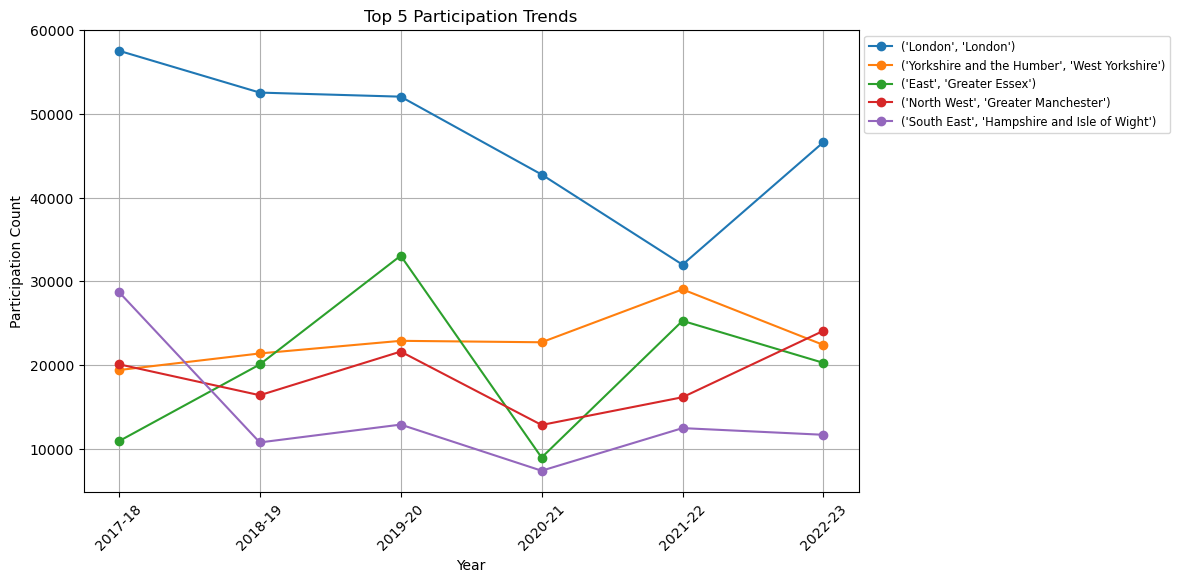

{('London', 'London'): 283568.8394697281,
 ('Yorkshire and the Humber', 'West Yorkshire'): 137744.39109913167,
 ('East', 'Greater Essex'): 118417.11690668148,
 ('North West', 'Greater Manchester'): 111061.20512511267,
 ('South East', 'Hampshire and Isle of Wight'): 83738.99071510072}

In [419]:
plot_category_trends(regionwise_males,top_n=5, mode='largest')

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_33444\1754979817.py:66: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


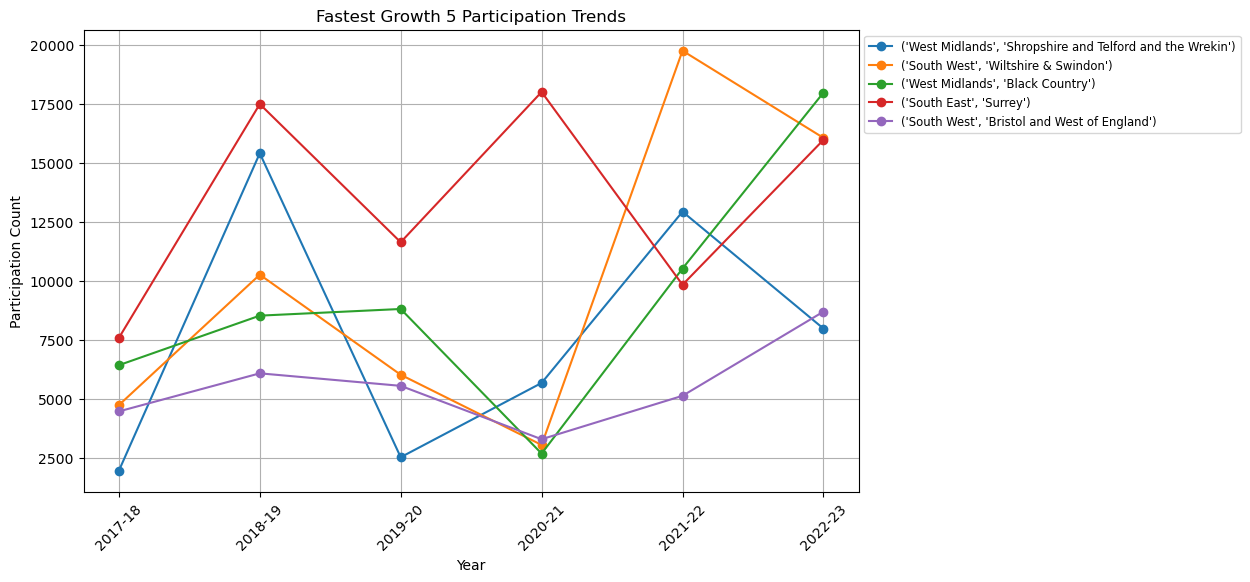

{('West Midlands', 'Shropshire and Telford and the Wrekin'): 3.042903404409878,
 ('South West', 'Wiltshire & Swindon'): 2.3785011708852073,
 ('West Midlands', 'Black Country'): 1.7898283732043028,
 ('South East', 'Surrey'): 1.1028430056270264,
 ('South West', 'Bristol and West of England'): 0.9404723786225868}

In [421]:
plot_category_trends(regionwise_males,top_n=5, mode='fastest_growth')

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_33444\1754979817.py:66: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


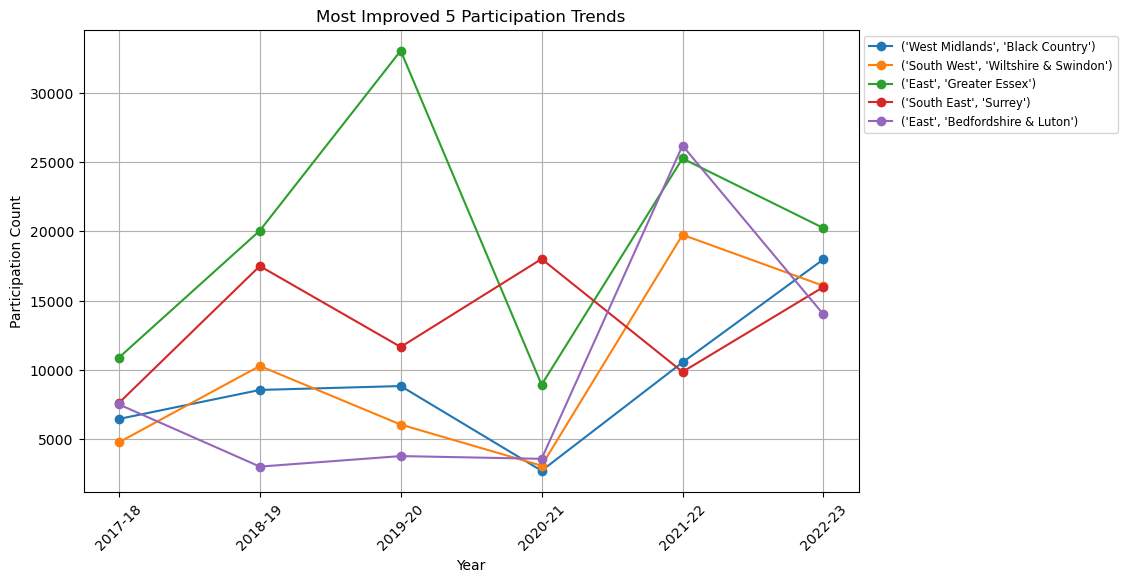

{('West Midlands', 'Black Country'): 11534.35919821361,
 ('South West', 'Wiltshire & Swindon'): 11309.825272224643,
 ('East', 'Greater Essex'): 9366.198872110519,
 ('South East', 'Surrey'): 8380.100269050208,
 ('East', 'Bedfordshire & Luton'): 6502.881029680372}

In [423]:
plot_category_trends(regionwise_males,top_n=5, mode='most_improved')

### Females

In [426]:
regionwise_females=group_by_columns(female_datasets, years, groupby_cols=['Region','CSP'], count_col=weighted_column)

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_33444\1754979817.py:66: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


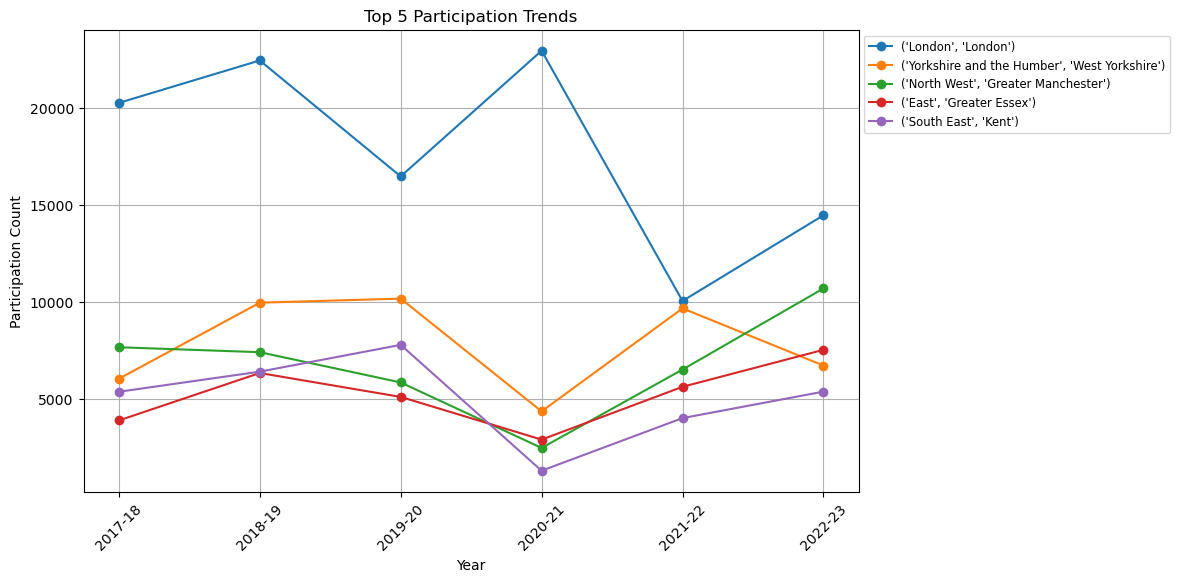

{('London', 'London'): 106620.1490100813,
 ('Yorkshire and the Humber', 'West Yorkshire'): 47024.469728508375,
 ('North West', 'Greater Manchester'): 40719.72183644813,
 ('East', 'Greater Essex'): 31525.47331342301,
 ('South East', 'Kent'): 30387.865757424337}

In [428]:
plot_category_trends(regionwise_females,top_n=5, mode='largest')

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_33444\1754979817.py:66: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


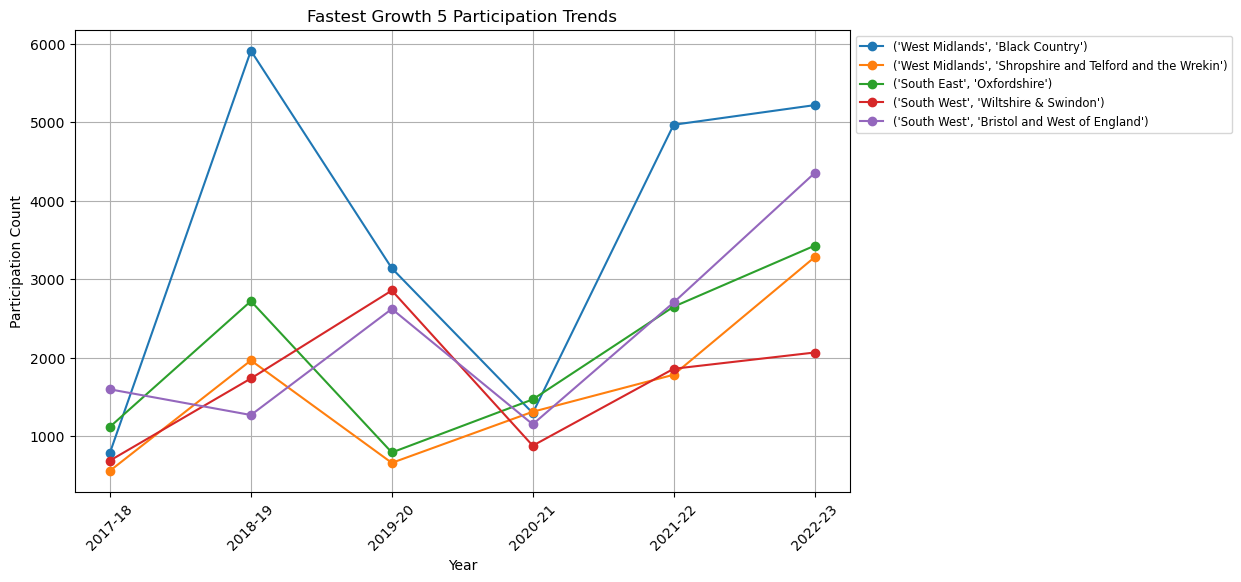

{('West Midlands', 'Black Country'): 5.6106216490382,
 ('West Midlands', 'Shropshire and Telford and the Wrekin'): 4.872934003199366,
 ('South East', 'Oxfordshire'): 2.0627107040353403,
 ('South West', 'Wiltshire & Swindon'): 2.000215825852316,
 ('South West', 'Bristol and West of England'): 1.7273942466071004}

In [430]:
plot_category_trends(regionwise_females,top_n=5, mode='fastest_growth')


C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_33444\1754979817.py:66: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


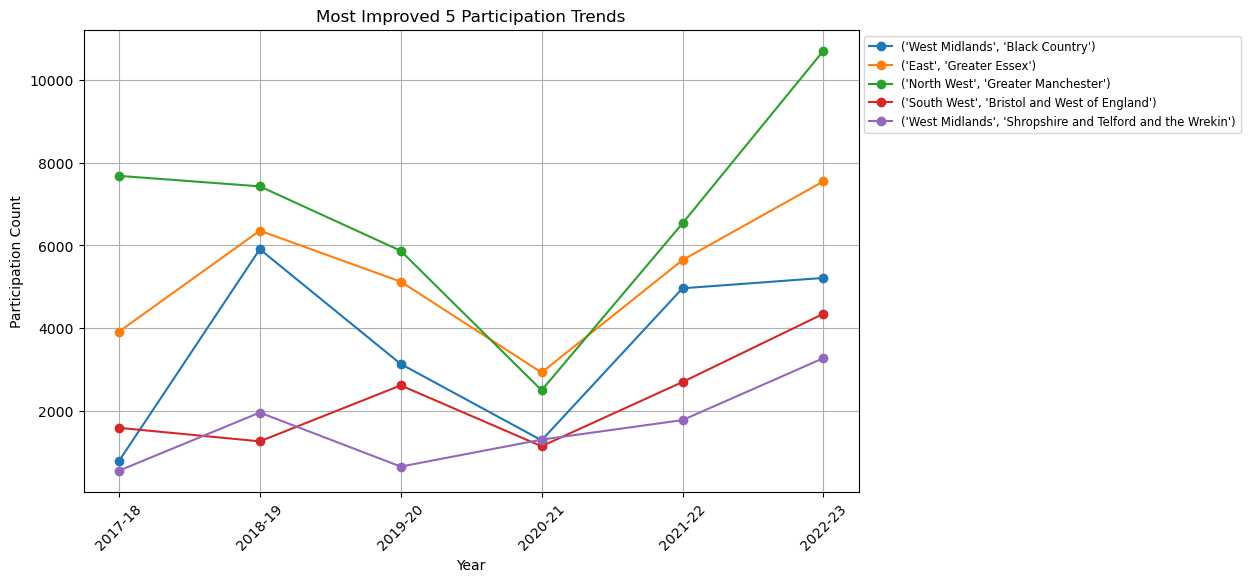

{('West Midlands', 'Black Country'): 4426.6984186379495,
 ('East', 'Greater Essex'): 3632.634351982747,
 ('North West', 'Greater Manchester'): 3022.546845046035,
 ('South West', 'Bristol and West of England'): 2754.730298904874,
 ('West Midlands',
  'Shropshire and Telford and the Wrekin'): 2719.2580288808376}

In [432]:
plot_category_trends(regionwise_females,top_n=5, mode='most_improved')

### Over-all

In [388]:
regionwise_overall=group_by_columns(datasets, years, groupby_cols=['Region','CSP'], count_col=weighted_column)

In [392]:
regionwise_overall

2017-18  \
Region                   CSP                                                   
East                     Bedfordshire & Luton                   11220.643262   
                         Greater Essex                          16238.088491   
                         Hertfordshire                          12746.848114   
                         Norfolk                                 5780.368331   
                         Peterborough & Cambridgeshire          10462.113798   
                         Suffolk                                10017.764325   
East Midlands            Derbyshire                              7075.393230   
                         Leicester, Leicestershire and Rutland  10133.089593   
                         Lincolnshire                            5888.248941   
                         Northamptonshire                        7006.408797   
                         Nottinghamshire                        10133.121120   
London                   London                                 84485.278946   
North East               Durham                                  1910.336616   
                         Northumberland                          3580.540089   
                         Tees Valley                             6955.312788   
                         Tyne and Wear                           8136.271427   
North West               Cheshire                               15147.186954   
                         Cumbria                                 6859.308301   
                         Greater Manchester                     30485.121485   
                         Lancashire                             13038.395956   
                         Merseyside                             18970.647098   
South East               Berkshire                               9362.744288   
                         Buckinghamshire and Milton Keynes      11453.126416   
                         Hampshire and Isle of Wight            35876.942654   
                         Kent                                   21867.726118   
                         Oxfordshire                             5048.380720   
                         Surrey                                 13273.708956   
                         Sussex                                 15608.412490   
South West               Bristol and West of England             6747.257966   
                         Cornwall and Isles of Scilly           13088.424425   
                         Devon                                  14577.453067   
                         Dorset                                  4125.449125   
                         Gloucestershire                        19345.671191   
                         Somerset                               13483.885337   
                         Wiltshire & Swindon                     6080.549224   
West Midlands            Birmingham                              4449.134658   
                         Black Country                           7907.362779   
                         Coventry, Solihull & Warwickshire      16653.374113   
                         Herefordshire and Worcestershire        8600.014064   
                         Shropshire and Telford and the Wrekin   2766.690477   
                         Staffordshire and Stoke-on-Trent       10377.341832   
Yorkshire and the Humber Humber                                 14832.013529   
                         North Yorkshire                        11301.741026   
                         South Yorkshire                        10809.536191   
                         West Yorkshire                         29593.154243   

                                                                     2018-19  \
Region                   CSP                                                   
East                     Bedfordshire & Luton                    4332.223723   
                         Greater Essex                          2862

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_33444\1754979817.py:66: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


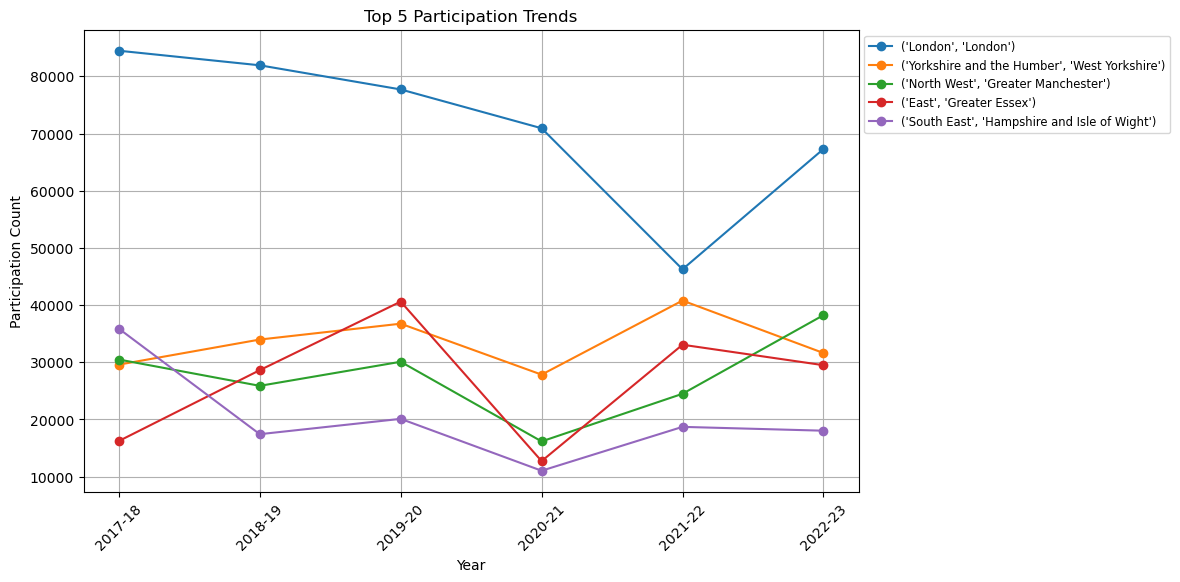

{('London', 'London'): 428622.2509031933,
 ('Yorkshire and the Humber', 'West Yorkshire'): 200591.603835715,
 ('North West', 'Greater Manchester'): 165367.7841703478,
 ('East', 'Greater Essex'): 160772.95776092168,
 ('South East', 'Hampshire and Isle of Wight'): 121211.09535075609}

In [390]:
plot_category_trends(regionwise_overall,top_n=5, mode='largest')

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_33444\1754979817.py:66: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


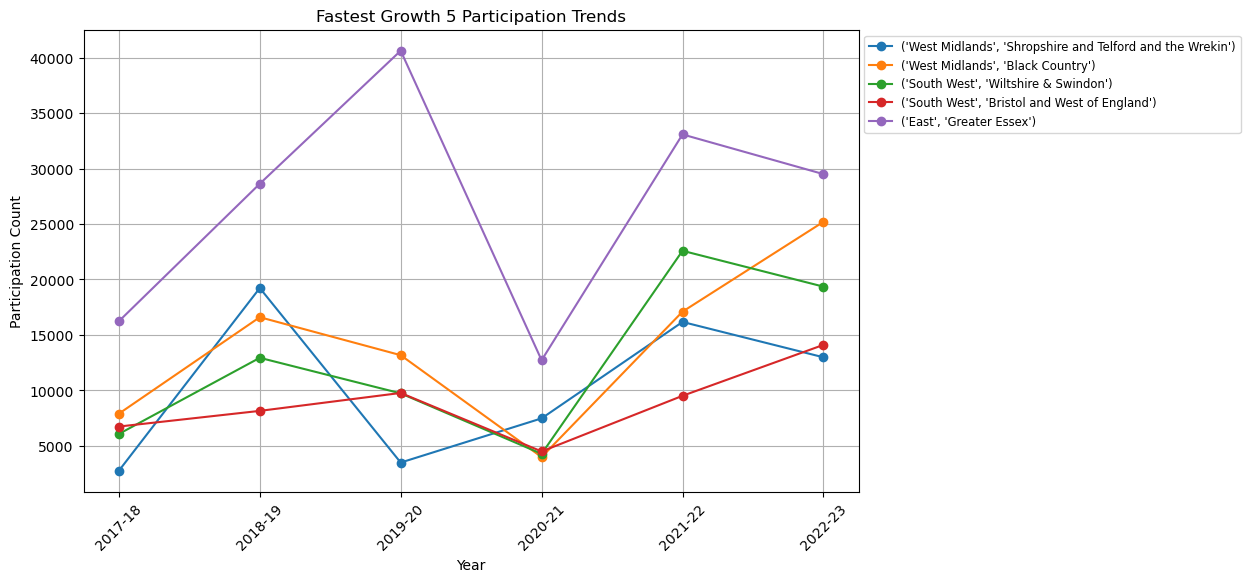

{('West Midlands',
  'Shropshire and Telford and the Wrekin'): 3.6948556350815522,
 ('West Midlands', 'Black Country'): 2.186346414389787,
 ('South West', 'Wiltshire & Swindon'): 2.1832487096565476,
 ('South West', 'Bristol and West of England'): 1.0907157607958173,
 ('East', 'Greater Essex'): 0.8164767630117057}

In [394]:
plot_category_trends(regionwise_overall,top_n=5, mode='fastest_growth')

C:\Users\Atharva Atul Joshi\AppData\Local\Temp\ipykernel_33444\1754979817.py:66: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(df.columns, df.loc[category], marker='o', linestyle='-', label=category)


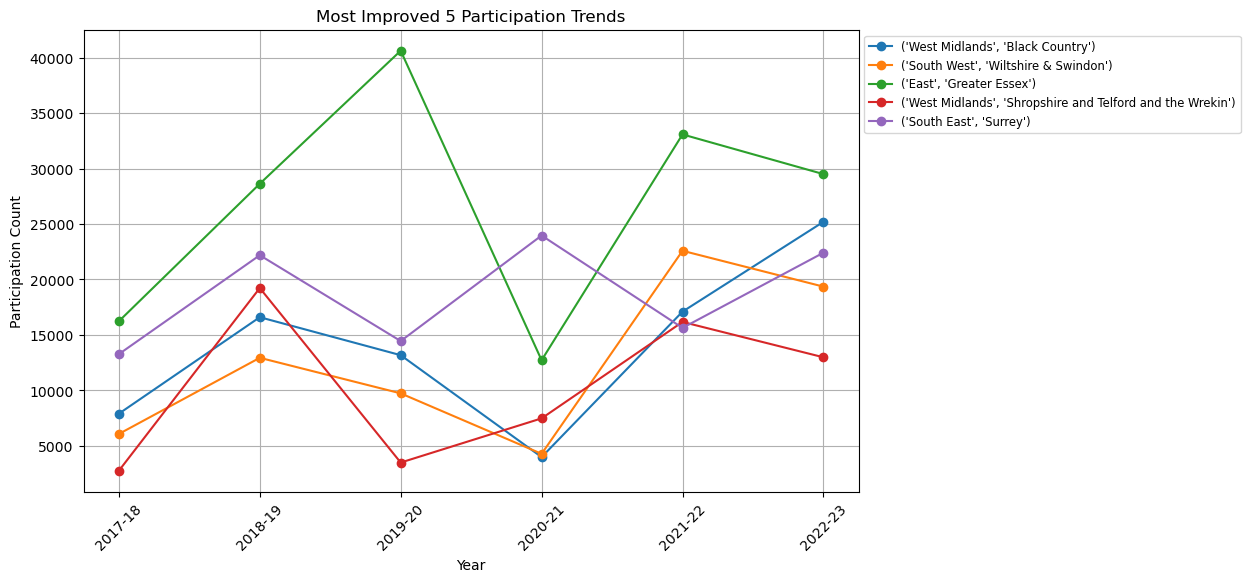

{('West Midlands', 'Black Country'): 17288.234258099546,
 ('South West', 'Wiltshire & Swindon'): 13275.351247061284,
 ('East', 'Greater Essex'): 13258.02192870628,
 ('West Midlands',
  'Shropshire and Telford and the Wrekin'): 10222.521899754609,
 ('South East', 'Surrey'): 9138.232149538397}

In [434]:
plot_category_trends(regionwise_overall,top_n=5, mode='most_improved')

## Trying the above group by function with Age related columns

In [311]:
df_2017_18

,Respondent_Serial,wt_gross,onceawk_modplus_everywhere_GR_RUGBY_CC018,Age,gend3,CSP,Region,Age_10.0,Age_11.0,Age_12.0,Age_13.0,Age_14.0,Age_15.0,Age_16.0,Age_5.0,Age_6.0,Age_7.0,Age_8.0,Age_9.0,Age_nan
0,179.0,52.218118,1.0,10.0,1.0,Gloucestershire,South West,1,0,0,0,0,0,0,0,0,0,0,0,0
1,180.0,52.218118,1.0,10.0,1.0,Gloucestershire,South West,1,0,0,0,0,0,0,0,0,0,0,0,0
2,186.0,52.218118,1.0,10.0,1.0,Gloucestershire,South West,1,0,0,0,0,0,0,0,0,0,0,0,0
3,211.0,52.218118,1.0,10.0,1.0,Gloucestershire,South West,1,0,0,0,0,0,0,0,0,0,0,0,0
4,246.0,283.560111,1.0,8.0,1.0,Wiltshire & Swindon,South West,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,225405.0,35.934929,1.0,9.0,2.0,Nottinghamshire,East Midlands,0,0,0,0,0,0,0,0,0,0,0,1,0
10685,225433.0,39.265896,1.0,10.0,1.0,Nottinghamshire,East Midlands,1,0,0,0,0,0,0,0,0,0,0,0,0
10686,225583.0,45.274524,1.0,9.0,1.0,Wiltshire & Swindon,South West,0,0,0,0,0,0,0,0,0,0,0,1,0
10687,225612.0,33.638333,1.0,14.0,4.0,Oxfordshire,South East,0,0,0,0,1,0,0,0,0,0,0,0,0


In [321]:
agewise_df=group_by_columns(datasets, years,groupby_cols=['Age'],count_col=sport_column)

In [323]:
agewise_df

,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23
Age,,,,,,
5.0,42,50,43,48,60,67
6.0,103,97,63,56,88,127
7.0,571,550,374,217,329,347
8.0,1194,1101,644,470,652,762
9.0,1260,1194,869,542,843,887
10.0,1290,1460,918,591,1068,1155
11.0,1485,1684,1205,686,1058,1560
12.0,1476,1522,1359,735,1274,1895
13.0,1287,1480,1131,598,1170,1511


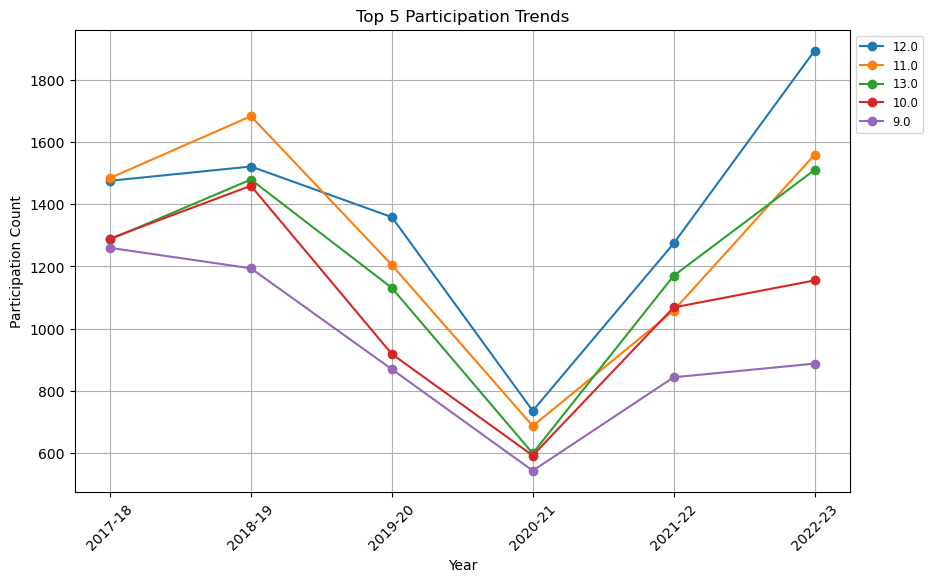

{12.0: 8261, 11.0: 7678, 13.0: 7177, 10.0: 6482, 9.0: 5595}

In [436]:
plot_category_trends(agewise_df, mode='largest')

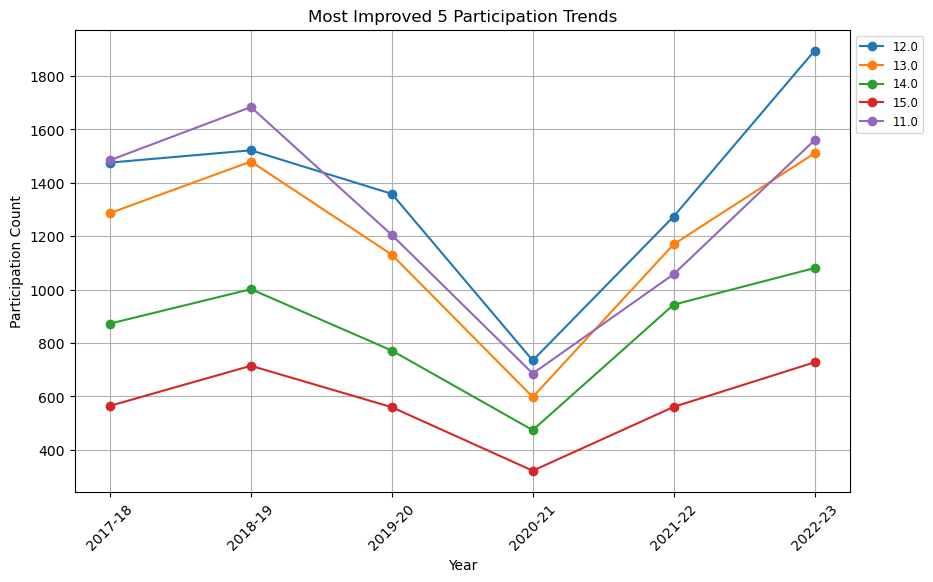

{12.0: 419, 13.0: 224, 14.0: 208, 15.0: 163, 11.0: 75}

In [438]:
plot_category_trends(agewise_df, mode='most_improved')